# fdfdpy test notebook

## Import/setup

In [1]:
from FDFD.Fdfd import Fdfd

import matplotlib.pylab as plt
import numpy as np
import scipy.sparse as sp

%load_ext autoreload
%autoreload 2
%matplotlib inline

## Dipole example

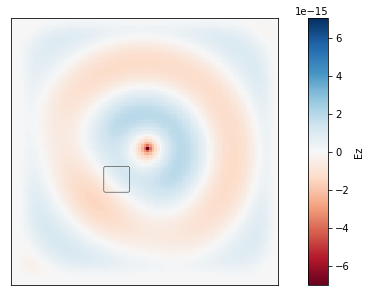

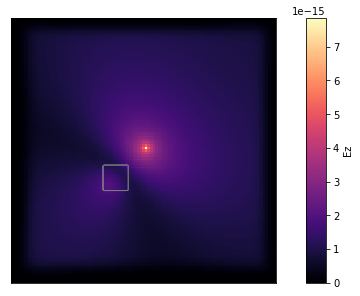

In [2]:
omega = 5e14                # angular frequency (2pi)
dl = 0.1                   # grid size (m)
eps_r = np.ones((101,101))  # relative permittivity
eps_r[35:45,35:45] = 2.5
NPML = [15, 15]             # number of pml grid points on x and y borders
pol = 'Ez'                  # polarization (either 'Hz' or 'Ez')

# sets simulation variables, constructs system matrix 'A', stored in 'simulation' object
simulation = Fdfd(omega,eps_r,dl,NPML,pol)# set source and solve for electromagnetic fields
b = np.zeros((simulation.Nx,simulation.Ny))
b[51,51] = 1
(Hx,Hy,Ez) = simulation.solve_fields(b)

simulation.plt_re(outline=True, cbar=True);
simulation.plt_abs(outline=True, cbar=True);


## Linear system solve

This is just a test to see that we can do generic linear algebra 

In [3]:
from FDFD.linalg import solver_direct

N = int(1e3)
density = 0.01
A = sp.csr_matrix(sp.rand(N, N, density)+1j*sp.rand(N, N, density)+sp.eye(N))
b = np.random.rand(N,1)+1j*np.random.rand(N,1)
x = solver_direct(A, b)
np.testing.assert_array_almost_equal((A*x).reshape(N,1), (b).reshape(N,1))